In [1]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/code/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=129455 sha256=57711350c739095e9abc8ec50c6f0d6eb65ba422d3b4e041548ecf5d3f8cc4c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ybxgo0f8/wheels/37/09/70/7b86f721614374ec311fa16ed21dbb33c1959d2c6f80461dfd
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
nb_erdos = 1

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.paths.meta_walks as mw
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos_dis_"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos_dis_"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  19
Nb of segmented links :  26.0
Nb of event times :  11


In [3]:
T = [0,10]
nb_node = 10
prob = 0.1
S = sg.erdos_renyi_discrete(T, nb_node,prob)
S.describe()

Nb of Nodes :  10
Nb of segmented nodes :  10.0
Nb of links :  57
Nb of segmented links :  95.0
Nb of event times :  11


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


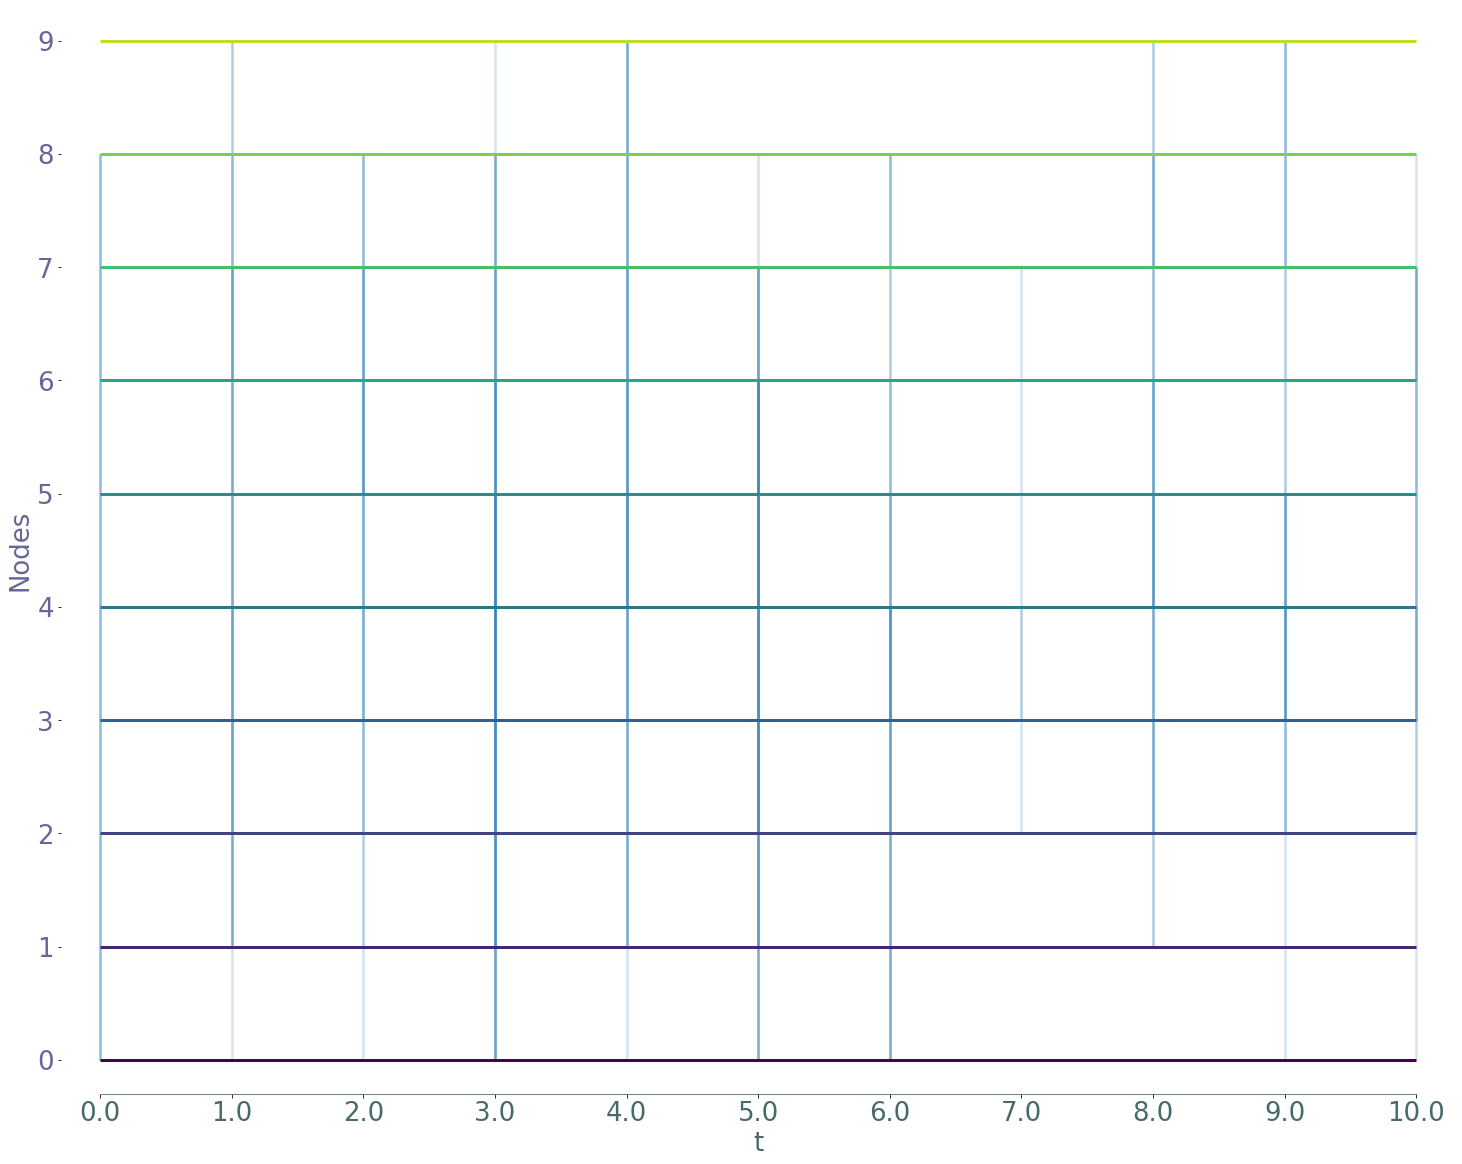

In [4]:
S.plot()

In [5]:
S.links

[(0, 1),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 8),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 1),
 (4, 2),
 (4, 6),
 (4, 7),
 (5, 1),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 8),
 (6, 0),
 (6, 1),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 2),
 (7, 4),
 (7, 6),
 (7, 8),
 (8, 0),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 9),
 (9, 1),
 (9, 3),
 (9, 6),
 (9, 7),
 (9, 8)]

In [6]:
S.link_presence[0]

[3, 3, 6, 6]

In [7]:
events, events_reverse = bt.events_dic(S)

In [8]:
neighbors, neighbors_inv = bt.neighbors_direct(S)

In [9]:
node = 1

In [12]:
import operator
import networkx as nx
b = operator.lt
walk_type = "passive"
fun =  mw.Metawalk.co_first_arrival

In [13]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, neighbors_inv, b, fun, walk_type)


TypeError: dijkstra_directed_dis_gen() missing 1 required positional argument: 'walk_type'

In [63]:
#pre, cur_best, opt_walk = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, neighbors_inv, b, fun, walk_type)


In [64]:
cur_best[2]

{0: 0, 1: inf, 2: inf, 3: inf, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}

In [65]:
opt_walk[6]

{0:  1 (0, 0) 6 | volume = 1.0 + 0.0·x¹ + 0.0·x²,
 1: ,
 2: ,
 3: ,
 4: ,
 5:  1 (0, 0) 2 (5, 5) 6 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³,
 6:  1 (0, 0) 2 (1, 1) 7 (1, 1) 0 (6, 6) 6 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵,
 7:  1 (0, 0) 2 (1, 1) 7 (1, 1) 0 (2, 2) 3 (7, 7) 6 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵ + 0.0·x⁶,
 8: ,
 9: ,
 10:  1 (0, 0) 2 (1, 1) 7 (1, 1) 0 (2, 2) 3 (10, 10) 6 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴ + 0.0·x⁵ + 0.0·x⁶}

In [50]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)


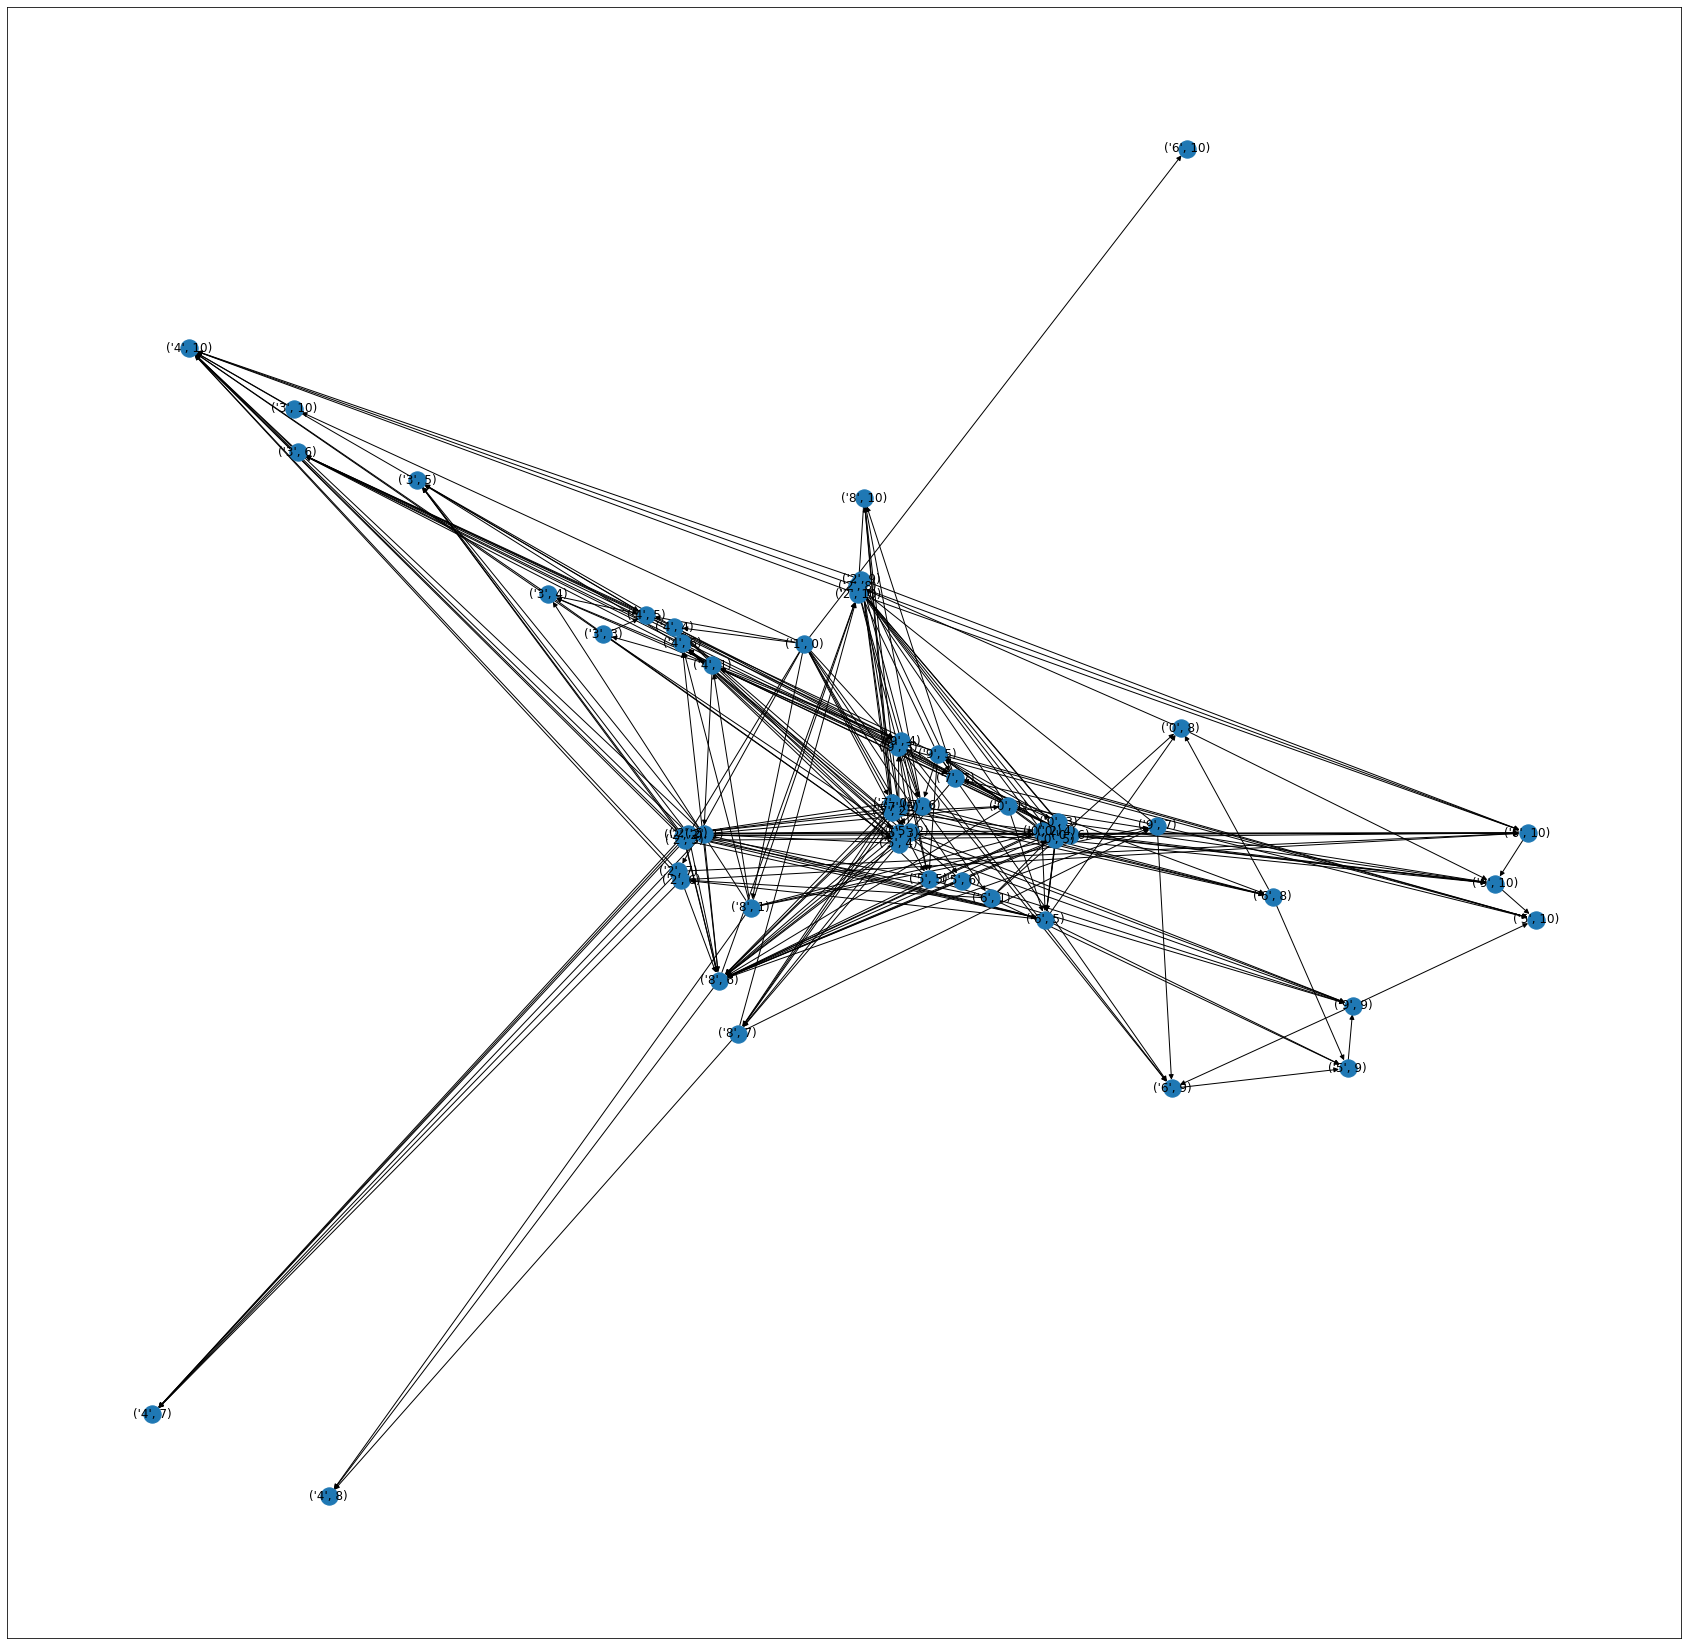

In [51]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [52]:
inf_scc = set()
scc = nx.kosaraju_strongly_connected_components(G.graph)
for s in scc:
    if len(s) > 1:
        inf_scc.add(s)

TypeError: unhashable type: 'set'

In [ ]:
H = nx.condensation(G.graph)
res = set()
for s in inf_scc:
    for e in nx.bfs_edges(H, s):
        inf_scc.add(e)

In [ ]:
temp_inf = set()
for s in inf_scc:
    for v in s:
        temp_inf.add(v)
for v in temp_inf:
    G.remove_node(v)

In [22]:
clos_inf = bt.infinite_closure(s, G, events, events_reverse, temp_inf, opt_walk, cur_best, mw.Metawalk.co_short, len(S.nodes))

In [23]:
node_inf = temp_inf.union(clos_inf)

In [24]:
sigma = bt.volume_metapaths_at_dis_gen(G, node, S.alpha)
if walk_type == "active":
    sigma_r = bt.optimal_with_resting_dis_gen(S, node, events, G, sigma, cur_best, unt, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes))
else:
    sigma_r = dict()
    for e in sigma.keys():
        sigma_r[e] = sigma[e]

In [25]:
sigma

{(1, 0): 1, (6, 9): 1, (6, 10): 1, (7, 7): 1}

In [26]:
sigma_r

{(1, 0): 1, (6, 9): 1, (6, 10): 1, (7, 7): 1}

In [27]:
min_values = { i:min(cur_best[i].values())   for i in S.nodes}

In [28]:
min_values

{0: inf, 1: 0.0, 2: inf, 3: inf, 4: inf, 5: inf, 6: 9, 7: 7, 8: inf, 9: inf}

In [29]:
sigma_dic = dict()
for (v,t) in sigma:
    if v not in sigma_dic:
        sigma_dic[v] = dict()
    sigma_dic[v][t] = sigma[(v,t)]

In [30]:
sigma_dic

{1: {0: 1}, 6: {9: 1, 10: 1}, 7: {7: 1}}

In [31]:
sigma_tot = { i : sum( sigma_dic[i][t] for t in sigma_dic[i].keys() if i in min_values and cur_best[i][t] == min_values[i]) for i in S.nodes if i != node and i in sigma_dic}

In [32]:
sigma_tot

{6: 1, 7: 1}

In [33]:
deltasvvt = bt.dictionary_svvt_dis_gen(G, node, sigma_r,min_values, cur_best, sigma_tot)

TypeError: dictionary_svvt_dis_gen() missing 1 required positional argument: 'events'

In [34]:
deltasvvt

NameError: name 'deltasvvt' is not defined

In [258]:
preced = bt.preced_node(S, G,events,events_reverse)

In [259]:
preced[1]

{3.0: 3.0,
 5.0: 5.0,
 8.0: 8.0,
 9.0: 9.0,
 4.0: 3.0,
 6.0: 5.0,
 7.0: 5.0,
 10.0: 9.0}

In [260]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, preced, walk_type)

In [261]:
contribution

{3: {10.0: 0.0,
  3.0: 1.0,
  1.0: 0.0,
  0.0: 0.0,
  2.0: 0.0,
  4.0: 0.0,
  5.0: 0.0,
  6.0: 0.0,
  7.0: 0.0,
  8.0: 0.0,
  9.0: 0.0},
 0: {10.0: 0.5,
  9.0: 0.0,
  5.0: 0.0,
  0.0: 0.5,
  1.0: 0.0,
  2.0: 0.0,
  3.0: 0.0,
  4.0: 0.0,
  6.0: 0.0,
  7.0: 0.0,
  8.0: 0.0},
 1: {8.0: 1.0,
  9.0: 0.0,
  3.0: 0.0,
  5.0: 0.0,
  0.0: 0.0,
  1.0: 0.0,
  2.0: 0.0,
  4.0: 0.0,
  6.0: 0.0,
  7.0: 0.0,
  10.0: 0.0},
 2: {7.0: 0.0,
  8.0: 0.0,
  3.0: 0.0,
  1.0: 1.0,
  0.0: 0.0,
  2.0: 0.0,
  4.0: 0.0,
  5.0: 0.0,
  6.0: 0.0,
  9.0: 0.0,
  10.0: 0.0},
 4: {0.0: 4.0,
  1.0: 0.0,
  2.0: 0.0,
  3.0: 0.0,
  4.0: 0.0,
  5.0: 0.0,
  6.0: 0.0,
  7.0: 0.0,
  8.0: 0.0,
  9.0: 0.0,
  10.0: 0.0}}